In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [10]:
male_count = df["gender"].value_counts()["male"]
female_count = df["gender"].value_counts()["female"]

print(f"Number of Male Students: {male_count}")
print(f"Number of Female Students: {female_count}")

Number of Male Students: 482
Number of Female Students: 518


In [11]:
print("Categories in gender variable: ", end=" ")
print(df["gender"].unique())

print("Categories in race_ethnicity: ", end=" ")
print(df["race_ethnicity"].unique())

print("Categories in parental_level_of_education: ", end=" ")
print(df["parental_level_of_education"].unique())

print("Categories in lunch: ", end=" ")
print(df["lunch"].unique())

print("Categories in test_preparation_course: ", end=" ")
print(df["test_preparation_course"].unique())

Categories in gender variable:  ['female' 'male']
Categories in race_ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch:  ['standard' 'free/reduced']
Categories in test_preparation_course:  ['none' 'completed']


In [12]:
numeric_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print(f"We have {len(numeric_features)} numeric features : {numeric_features}")
print(f"We have {len(categorical_features)} categorical features : {categorical_features}")

We have 3 numeric features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df['total_marks'] = df['math_score'] + df['reading_score'] + df['writing_score']
df["average"] = df['total_marks']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading_score'] == 100].average.count()
writing_full = df[df['writing_score'] == 100].average.count()
math_full = df[df['math_score'] == 100].average.count()

print(f"Number of students who scored full marks in reading: {reading_full}")
print(f"Number of students who scored full marks in writing: {writing_full}")
print(f"Number of students who scored full marks in math: {math_full}")

Number of students who scored full marks in reading: 17
Number of students who scored full marks in writing: 14
Number of students who scored full marks in math: 7


In [15]:
reading_fail = df[df['reading_score'] < 33].average.count()
writing_fail = df[df['writing_score'] < 33].average.count()
math_fail = df[df['math_score'] < 33].average.count()

print(f"Number of students who failed in reading: {reading_fail}")
print(f"Number of students who failed in writing: {writing_fail}")
print(f"Number of students who failed in math: {math_fail}")



Number of students who failed in reading: 11
Number of students who failed in writing: 12
Number of students who failed in math: 19


Text(0.5, 1.0, 'Average Marks Distribution')

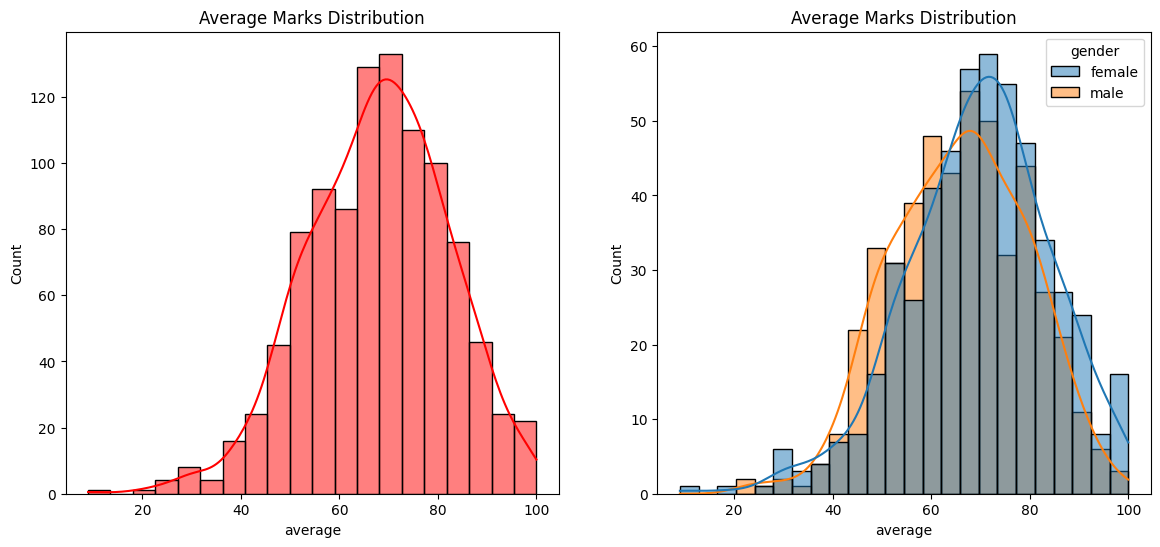

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['average'],bins=20, kde=True, color='red')
plt.title('Average Marks Distribution')
plt.subplot(1, 2, 2)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.title('Average Marks Distribution')

Text(0.5, 1.0, 'Total Marks Distribution')

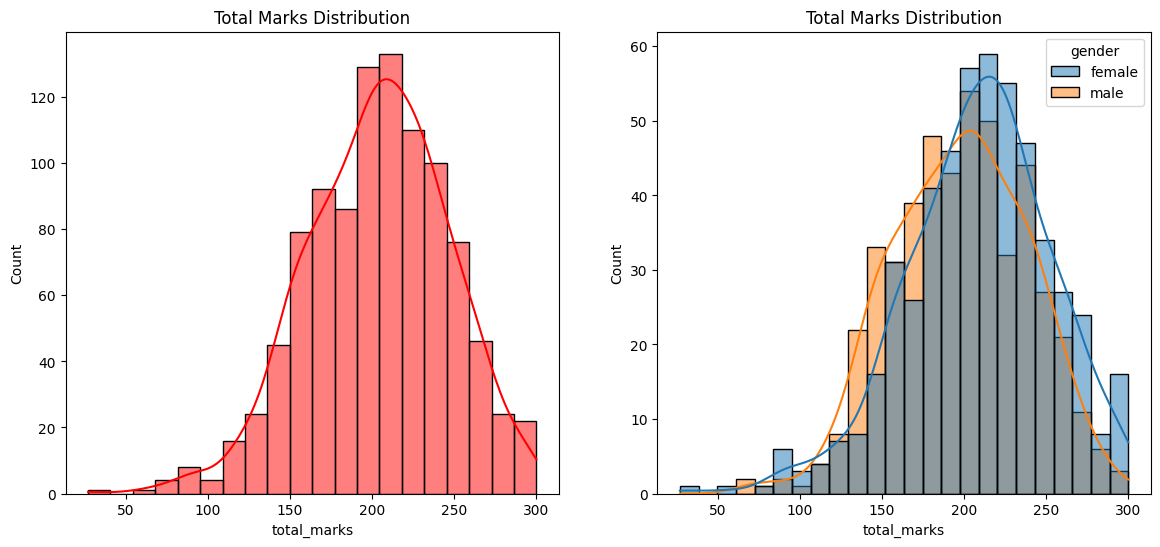

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['total_marks'],bins=20, kde=True, color='red')
plt.title('Total Marks Distribution')
plt.subplot(1, 2, 2)
sns.histplot(data=df,x='total_marks',kde=True,hue='gender')
plt.title('Total Marks Distribution')

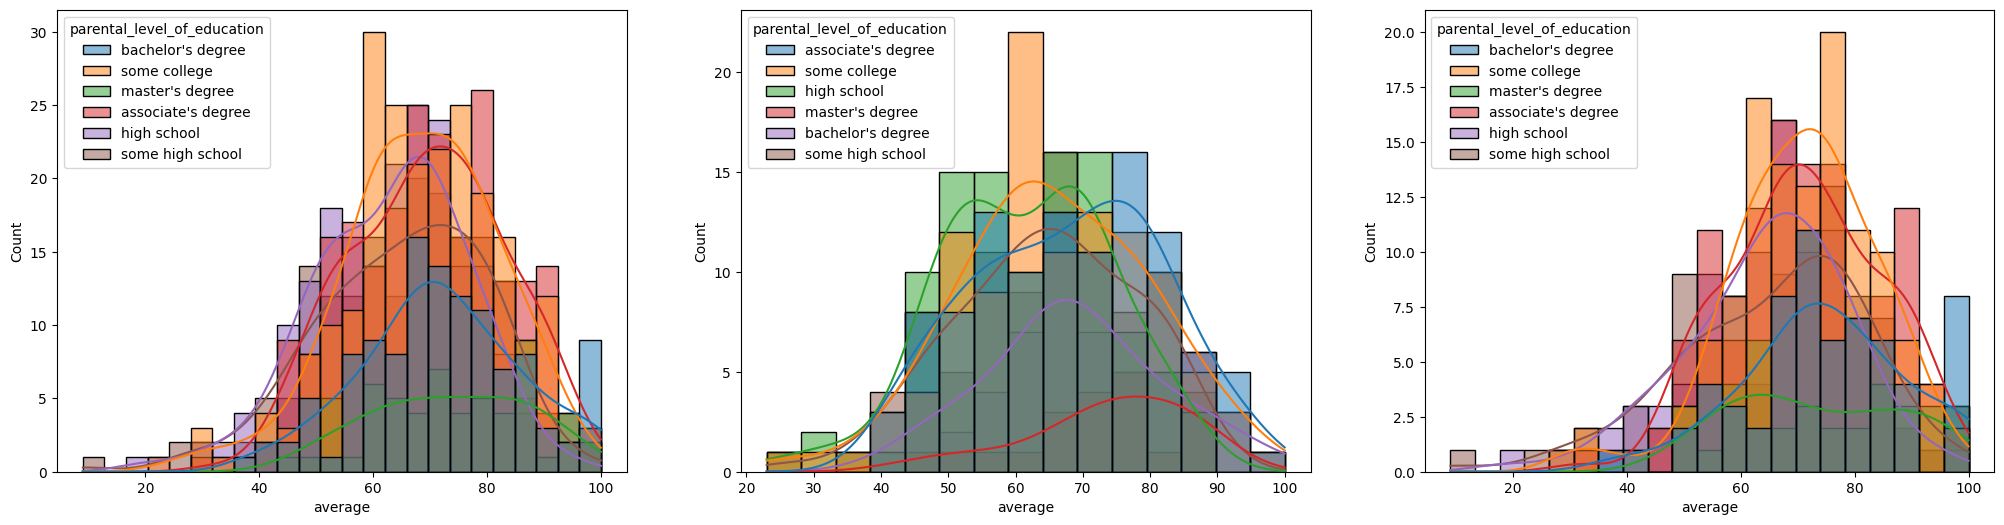

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(1,3,2)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(1,3,3)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

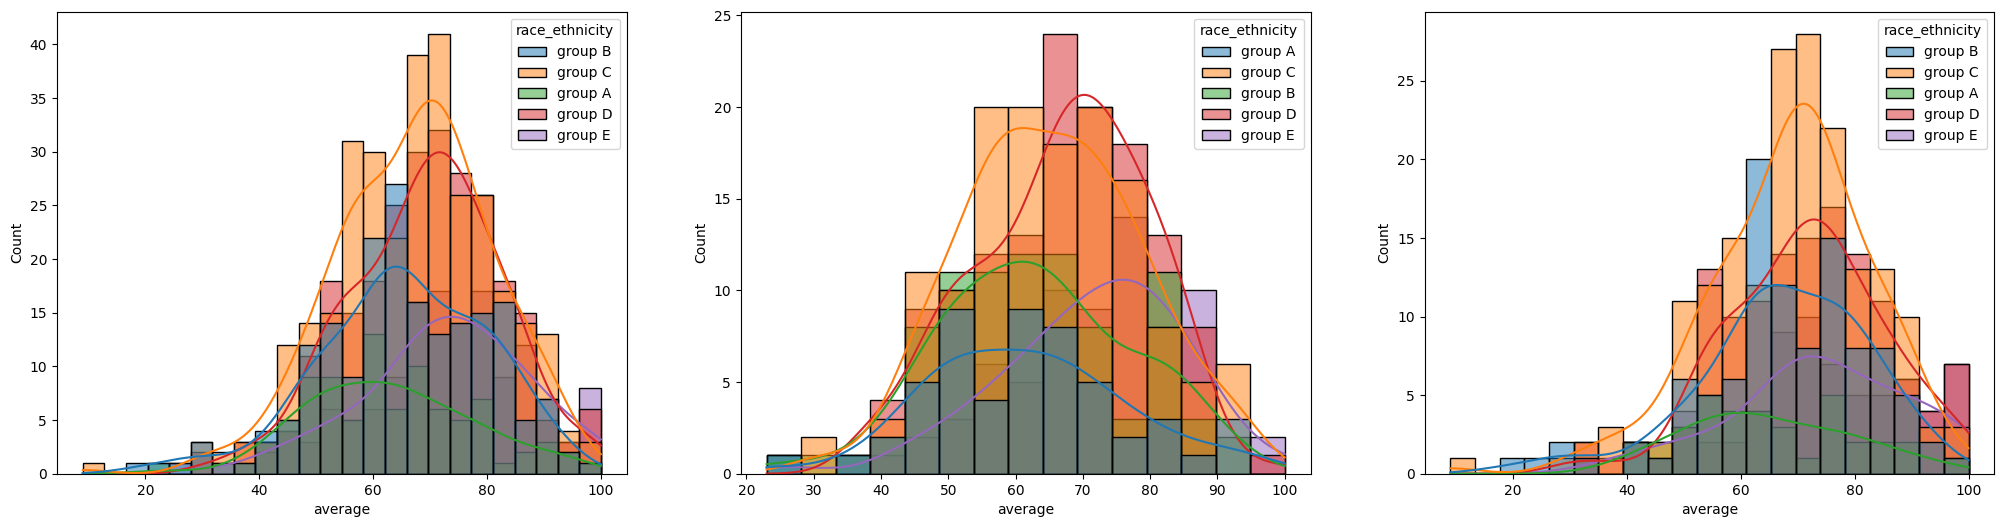

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(1,3,2)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(1,3,3)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.show()

<Axes: title={'center': 'Writing Score'}, ylabel='writing_score'>

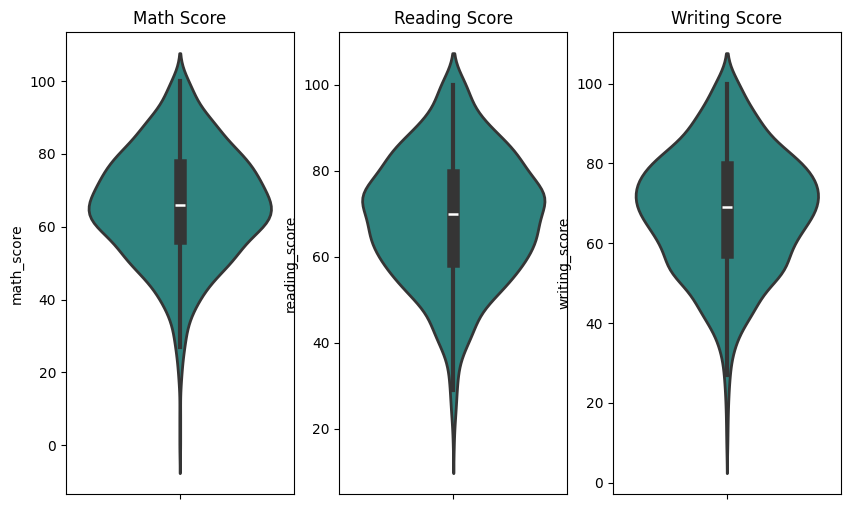

In [20]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.title('Math Score')
sns.violinplot(y="math_score",data=df,palette='viridis',linewidth=2)
plt.subplot(1,3,2)
plt.title('Reading Score')
sns.violinplot(y="reading_score",data=df,palette='viridis',linewidth=2)
plt.subplot(1,3,3)
plt.title('Writing Score')
sns.violinplot(y="writing_score",data=df,palette='viridis',linewidth=2)

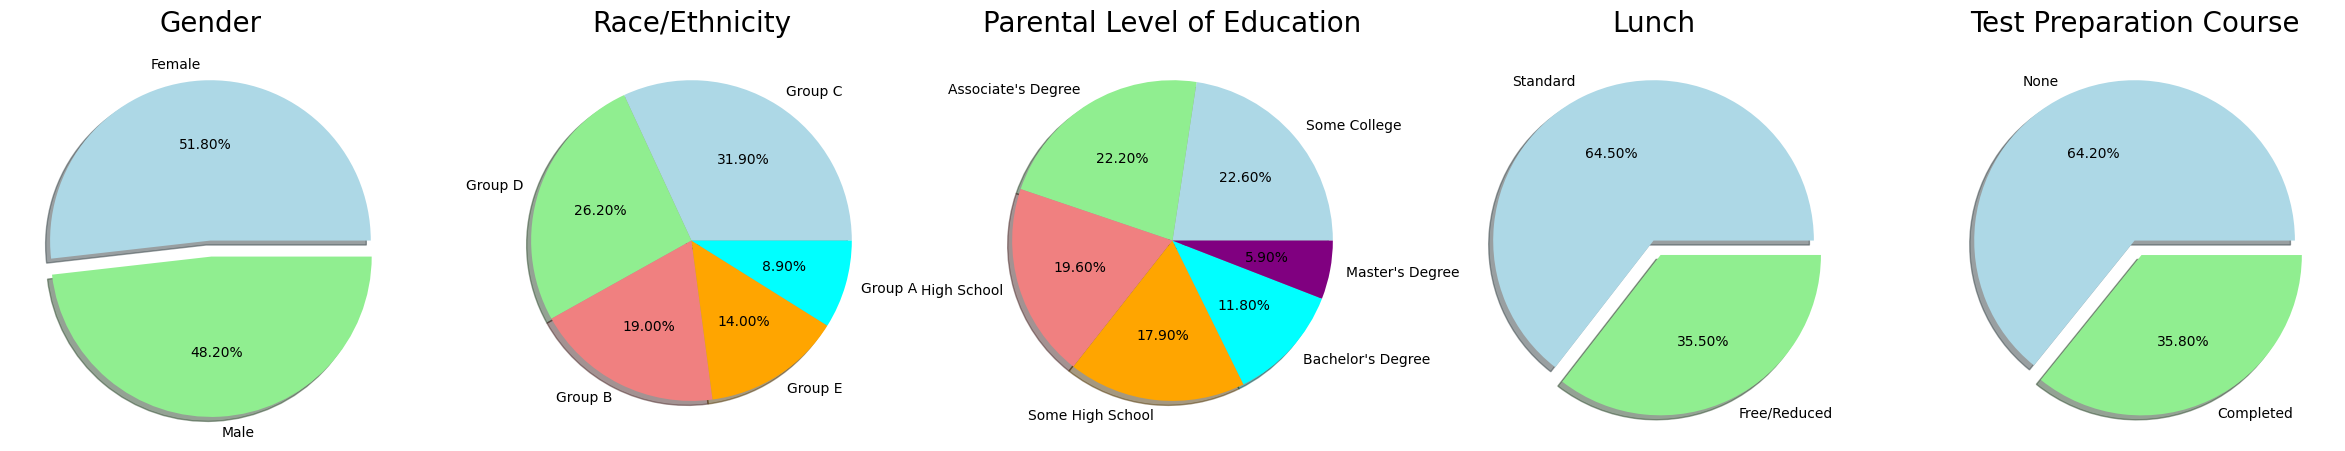

In [21]:
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1,5,1)
size = df["gender"].value_counts()
labels = "Female" , "Male"
colors = ['lightblue', 'lightgreen']
explode = [0, 0.1]
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title("Gender", fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df["race_ethnicity"].value_counts()
labels = "Group C" , "Group D", "Group B", "Group E", "Group A"
colors = ['lightblue', 'lightgreen', 'lightcoral', 'orange', 'cyan']
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title("Race/Ethnicity", fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df["parental_level_of_education"].value_counts()
labels = "Some College" , "Associate's Degree", "High School", "Some High School", "Bachelor's Degree", "Master's Degree"
colors = ['lightblue', 'lightgreen', 'lightcoral', 'orange', 'cyan', 'purple']
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title("Parental Level of Education", fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df["lunch"].value_counts()
labels = "Standard" , "Free/Reduced"
colors = ['lightblue', 'lightgreen']
explode = [0, 0.1]
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title("Lunch", fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = df["test_preparation_course"].value_counts()
labels = "None" , "Completed"
colors = ['lightblue', 'lightgreen']
explode = [0, 0.1]
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title("Test Preparation Course", fontsize = 20)
plt.axis('off')

plt.show()

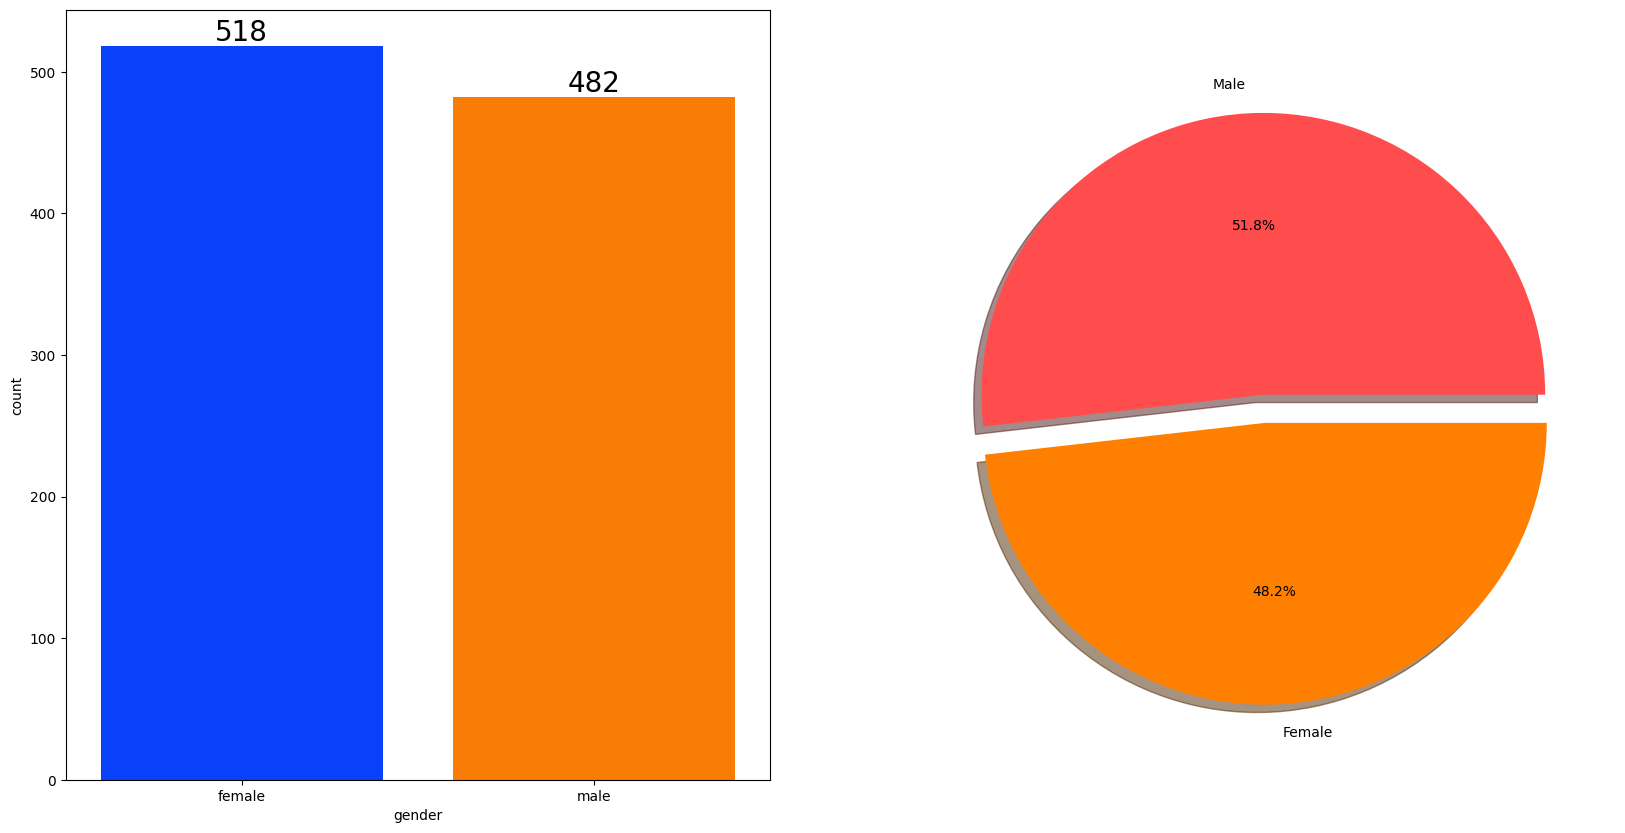

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

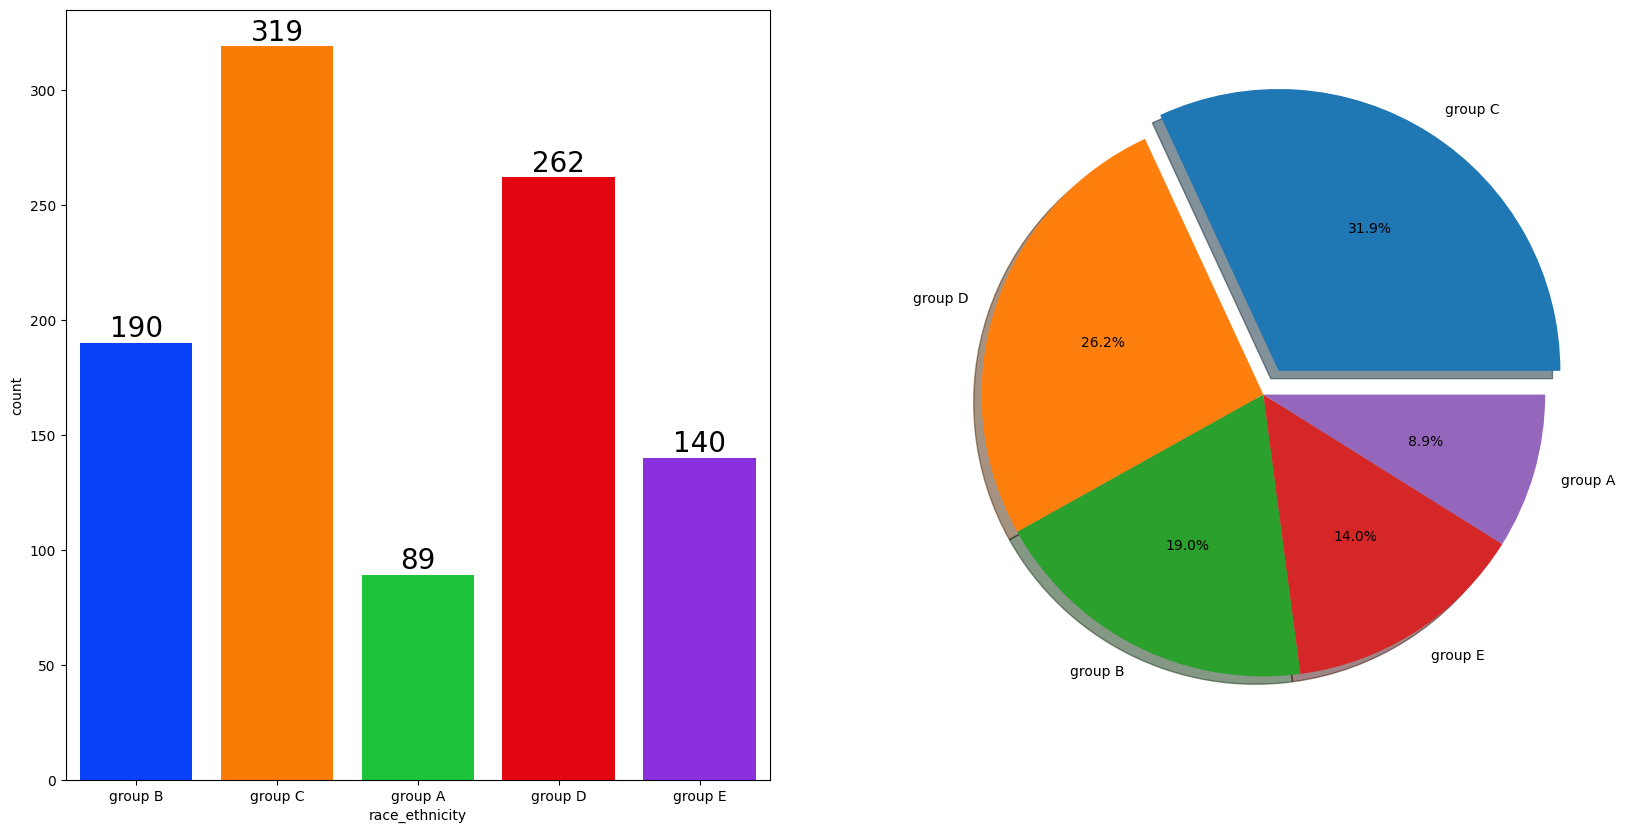

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

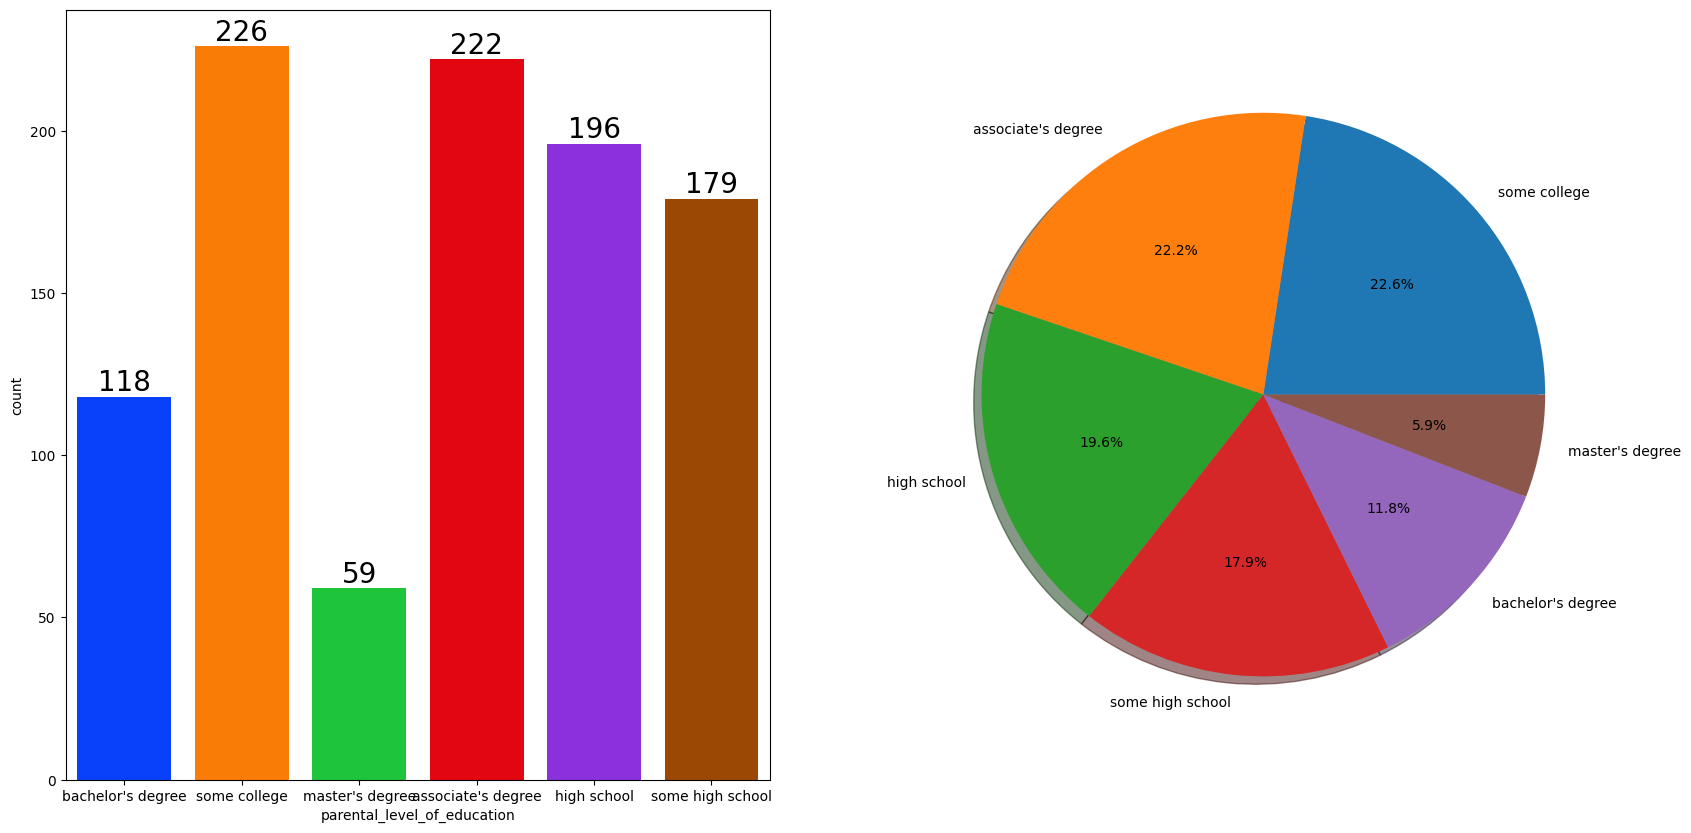

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['parental_level_of_education'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['parental_level_of_education'].value_counts(),labels=df['parental_level_of_education'].value_counts().index,autopct='%1.1f%%',shadow=True)
plt.show() 

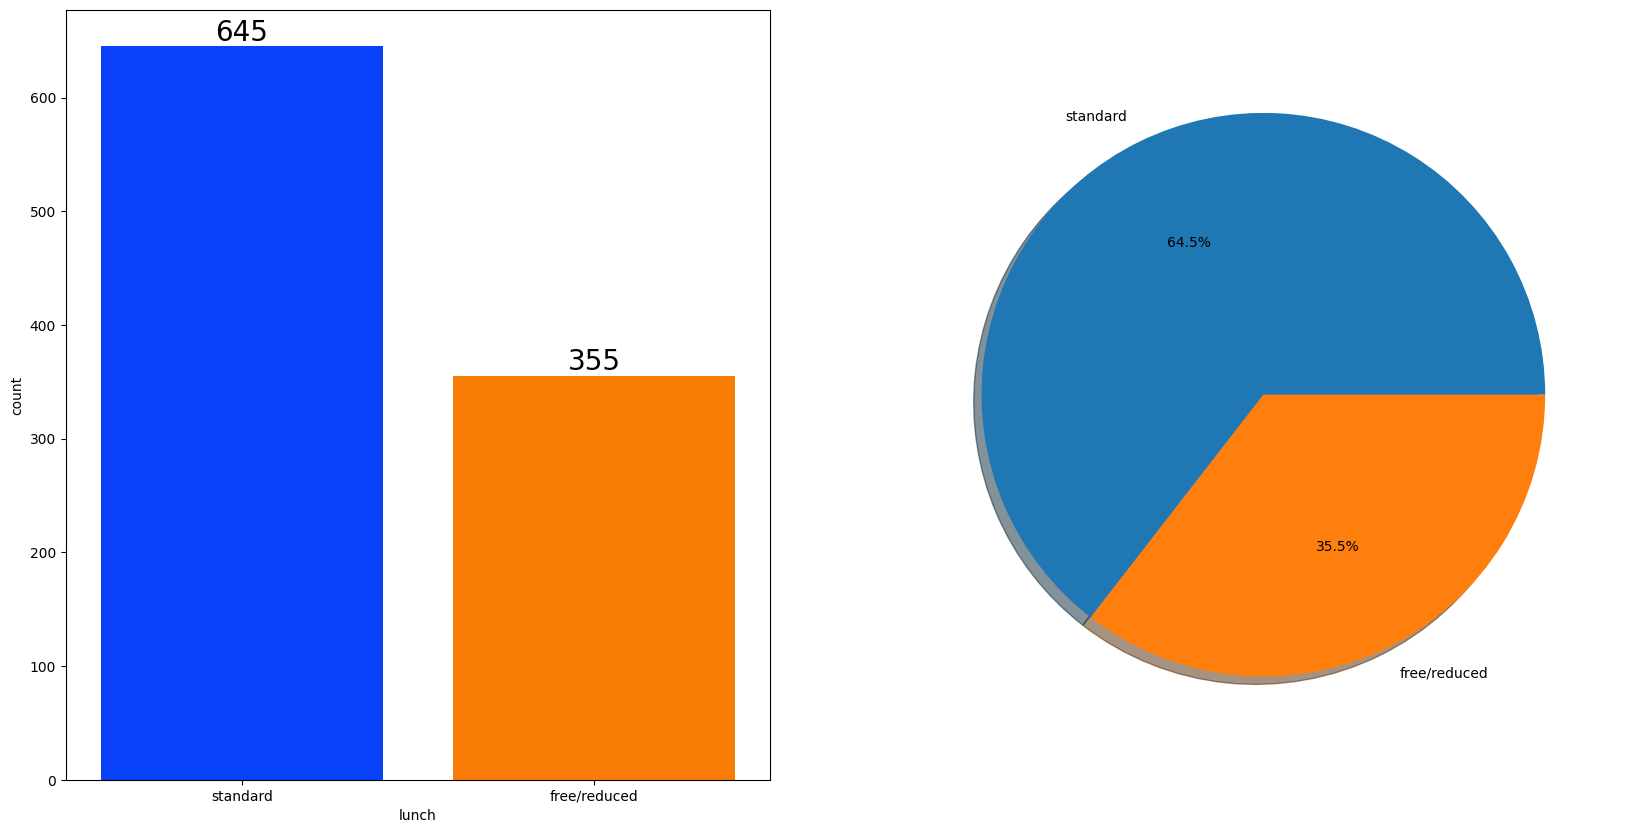

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['lunch'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['lunch'].value_counts(),labels=df['lunch'].value_counts().index,autopct='%1.1f%%',shadow=True)
plt.show()

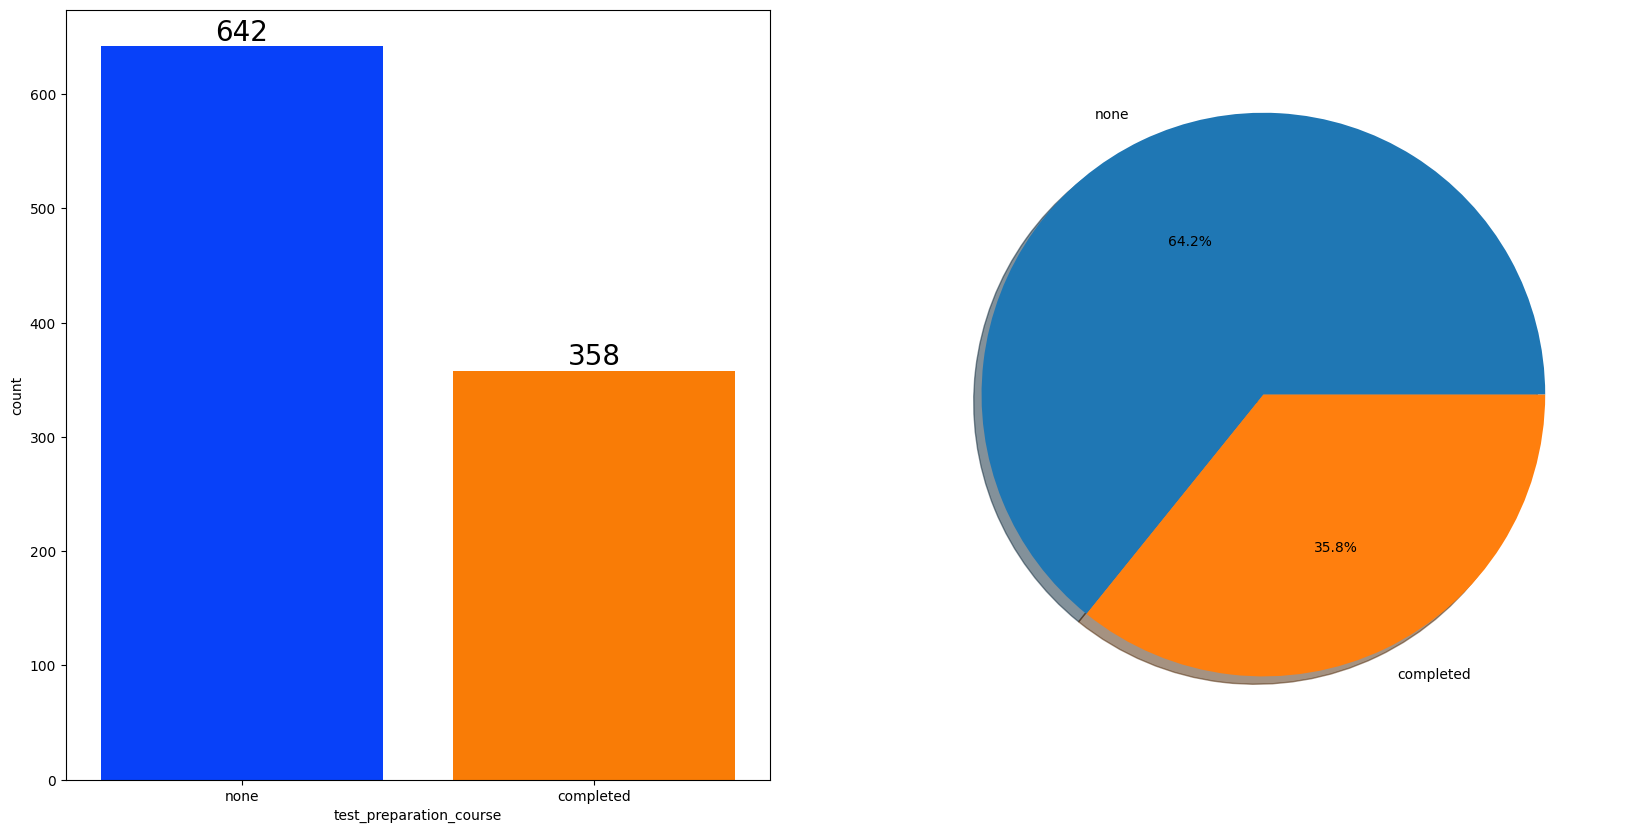

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['test_preparation_course'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['test_preparation_course'].value_counts(),labels=df['test_preparation_course'].value_counts().index,autopct='%1.1f%%',shadow=True)
plt.show()

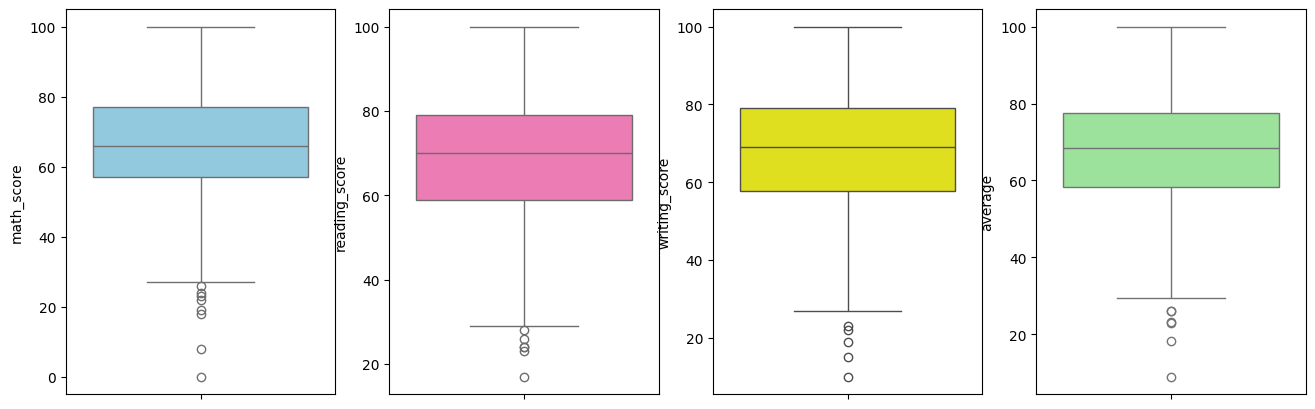

In [36]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(1,4,1)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(1,4,2)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(1,4,3)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(1,4,4)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

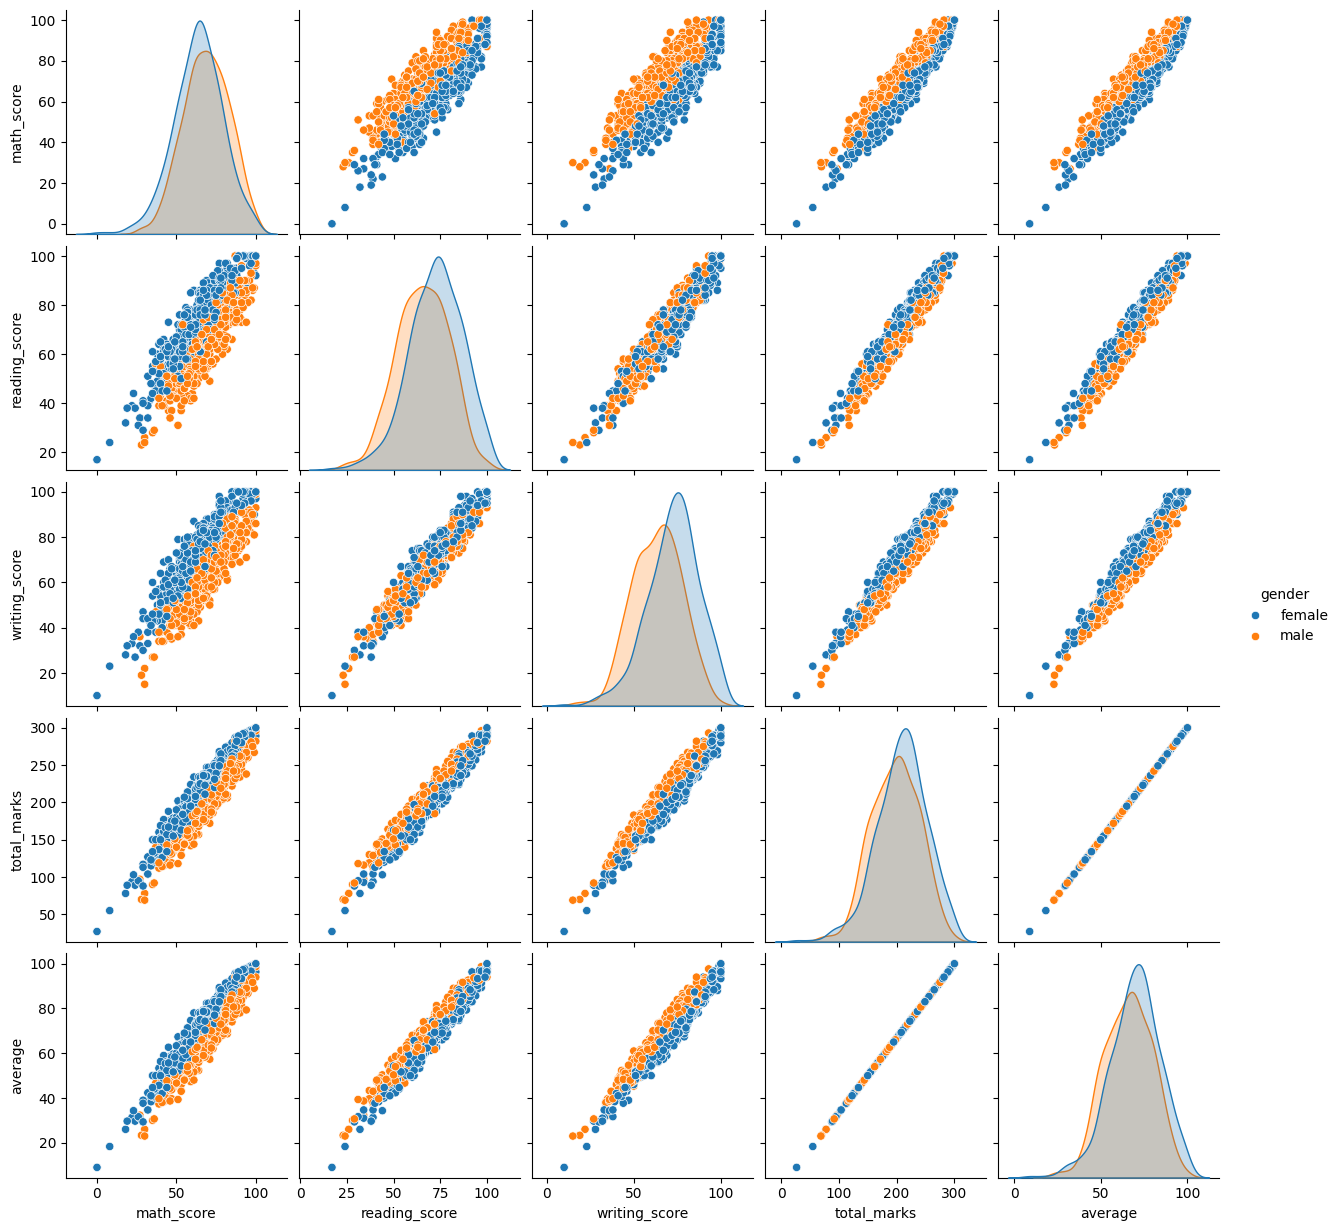

In [37]:
sns.pairplot(df,hue = 'gender')
plt.show()